Imports

In [1]:
from ROOT import TFile,TTree,TCanvas,TH1F, gStyle, TLatex, gPad, TLegend, TLorentzVector, TH2F, TLine, TF1, TBox, RDataFrame, TPad, TF2
import ROOT
import numpy as np
%run ../../dihadron_toolkit/tools.ipynb

Welcome to JupyROOT 6.22/06



Load up some basic plot settings and TLatex 



In [2]:
gStyle.SetOptStat(0)
gStyle.SetHistLineWidth(2)
gStyle.SetTitleXSize(0.045)
gStyle.SetTitleYSize(0.035)
gStyle.SetTitleYOffset(1.2)
gStyle.SetPalette(55)
gStyle.SetNumberContours(50)

latex=TLatex()
latex.SetTextSize(0.03)

biglatex=TLatex()
biglatex.SetTextSize(0.045)

smalllatex=TLatex()
smalllatex.SetTextSize(0.022)

Create an RDataFrame by importing the root files from the analysis

In [3]:
ROOT.EnableImplicitMT()
d = RDataFrame("tree_postprocess", {"../../../data/fall2018-torus-1-v1-nSidis/may24_*.root",
                                    "../../../data/fall2018-torus+1-v1-nSidis/may25_*.root"})

Define cuts for the asymmetry plots

In [4]:
beta_cut = "abs(beta1-1)< 0.01 && abs(beta2-1) < 0.01"
sideband_cut = "Mdiphoton > 0.17 && Mdiphoton < 0.4"
signal_cut = "Mdiphoton > 0.108 && Mdiphoton < 0.160"

Define bins for Mh asymmetry

In [5]:
Mhbins = np.linspace(0.3,1.3,7)

Get Mgg plots for each Mh range

In [6]:
h_plus, h_minus = get_Mh_asym_plots(d,[beta_cut],Mhbins,100,0.08,0.2)

Prepare Mgg plots for plotting (gets fit and residual plot)

In [7]:
f_plus, res_plus = process_Mgg(h_plus,"crystalball(0)+pol2(5)",7,0.08,0.2)
f_minus, res_minus = process_Mgg(h_minus,"crystalball(0)+pol2(5)",7,0.08,0.2)

Plot Mdiphoton distributions, fits, and residuals for helicity = +1

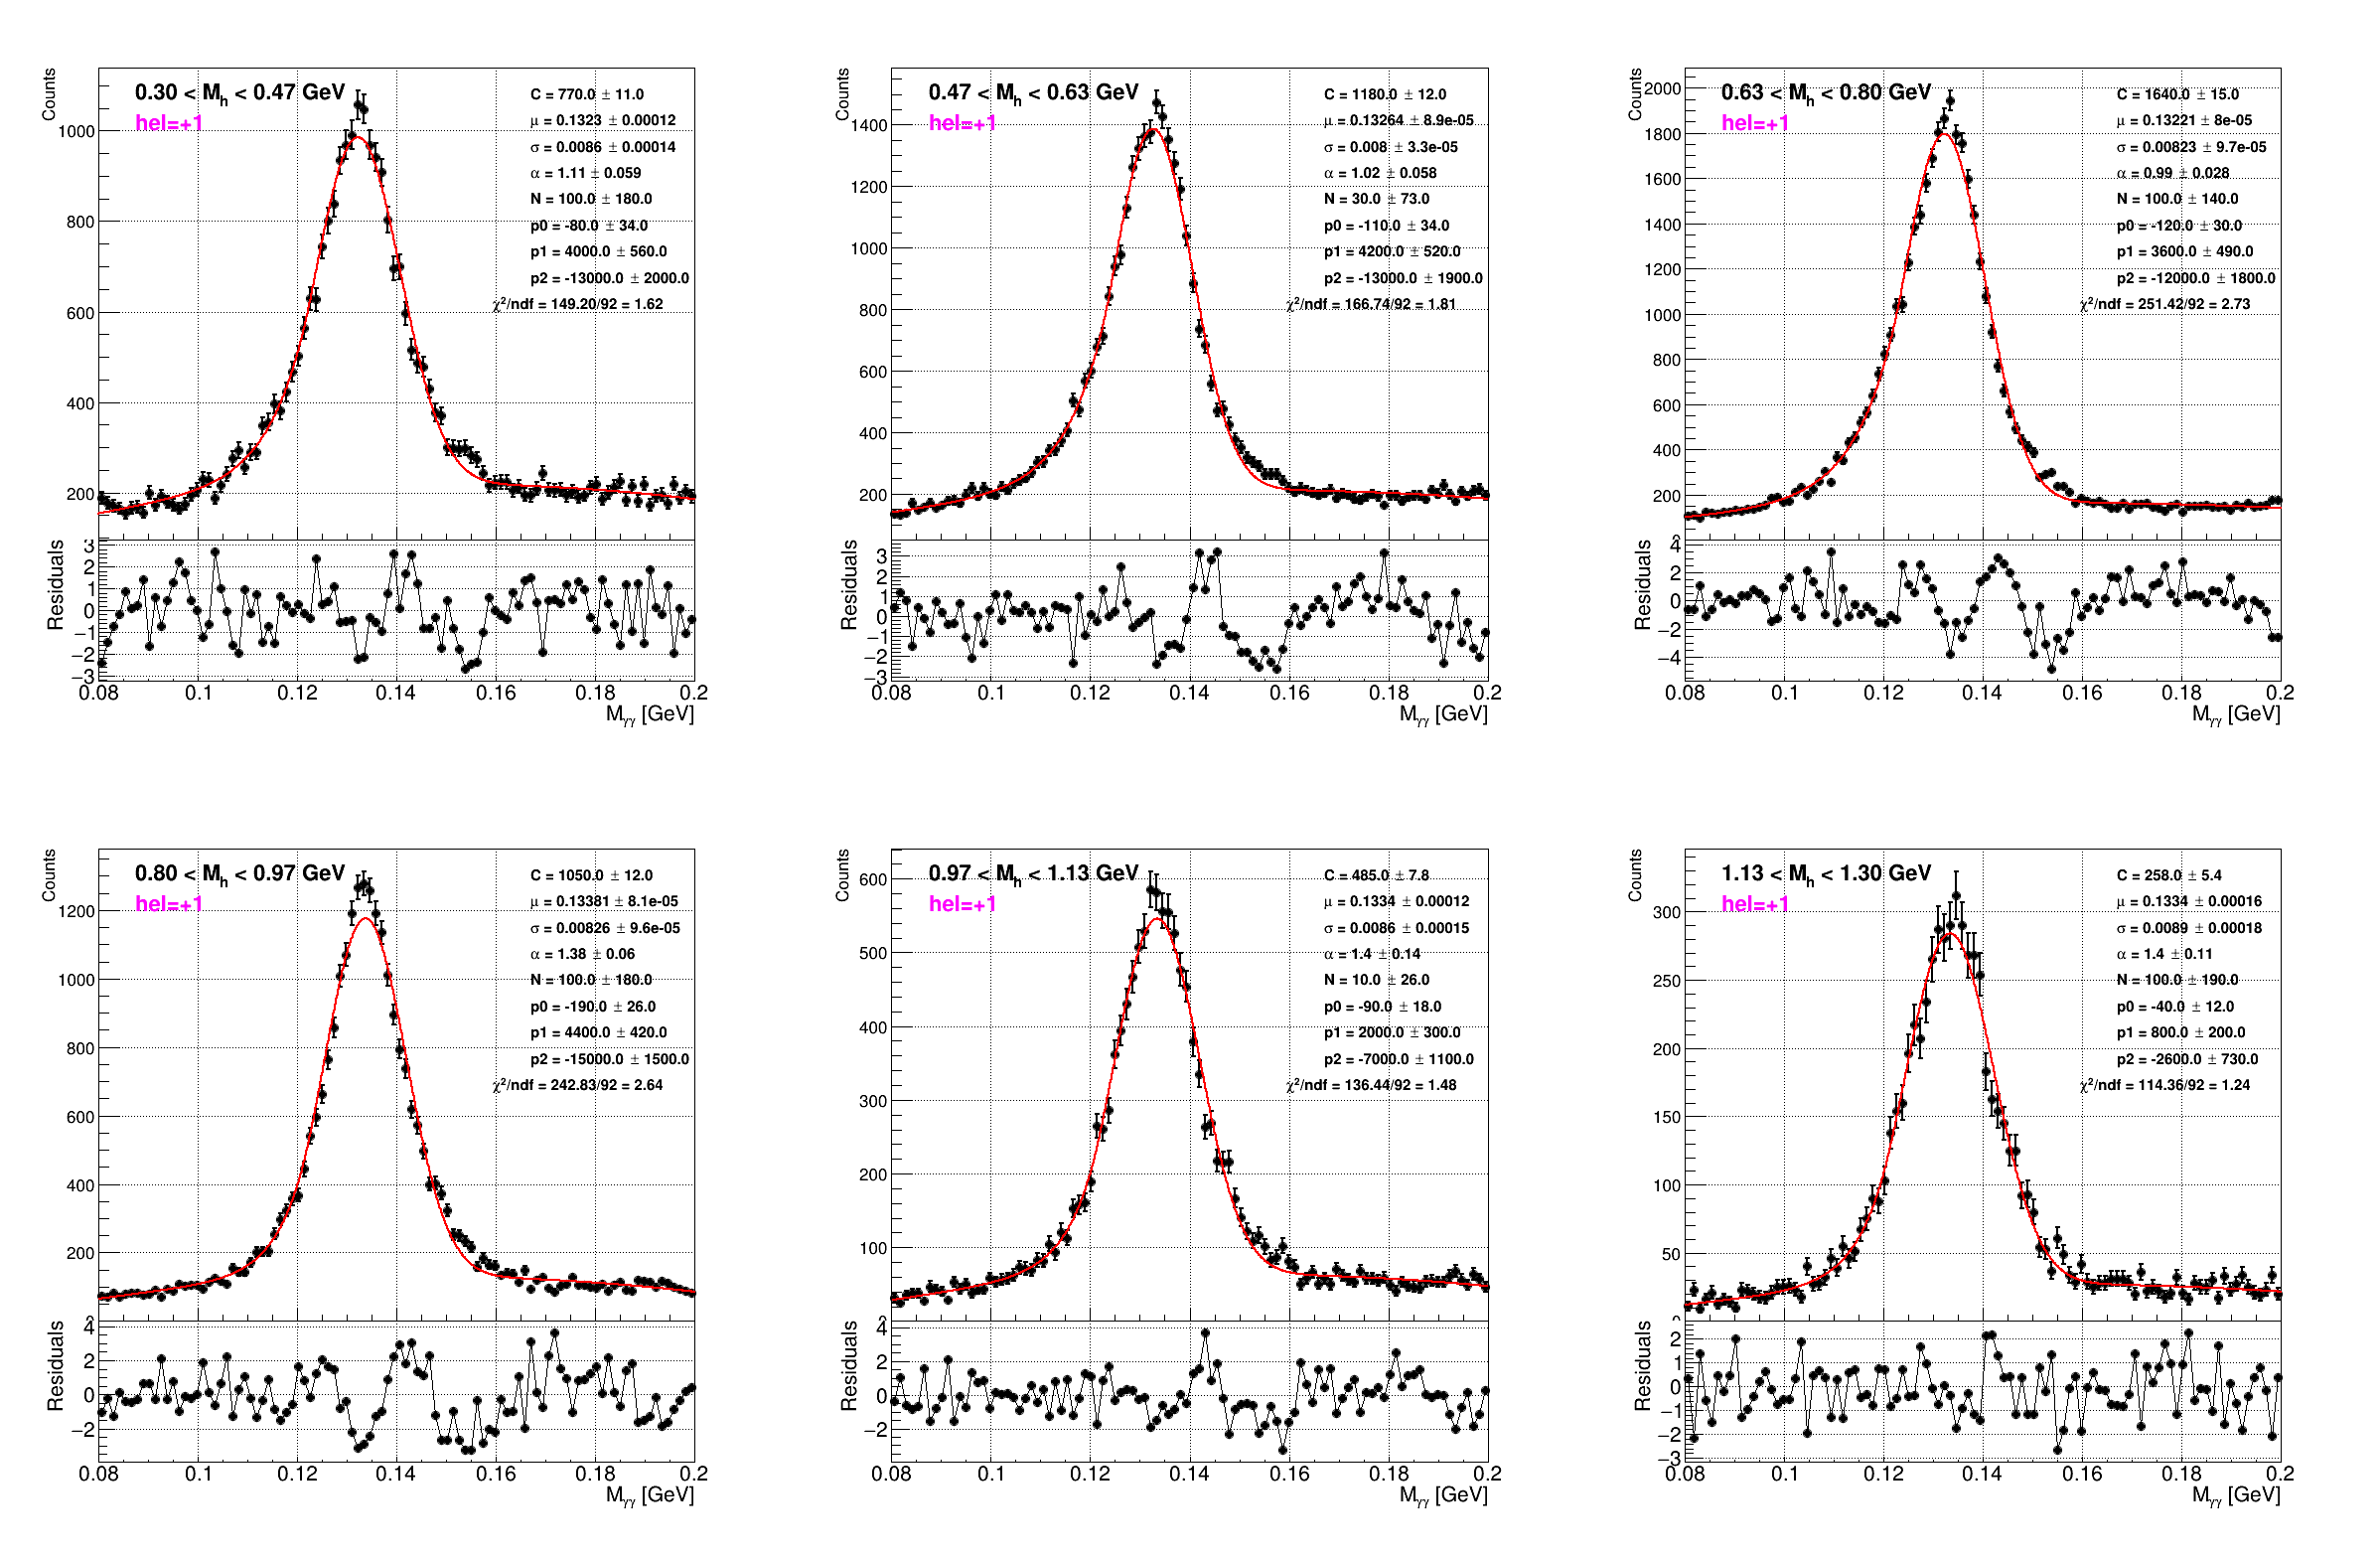

In [8]:
c = TCanvas("c","c",2400,1600)
c.Divide(3,2)
for i in range(6):
    c.cd(i+1)
    
    # =========== Draw fit =========== #
    p1 = TPad("p1{}".format(i),"p1{}".format(i),0,0.3,1,1)
    p1.Draw()
    p1.cd()
    p1.SetBottomMargin(0)
    h_plus[i].Draw("E1")
    f_plus[i].Draw("same")
    gPad.SetGrid()
    biglatex.DrawLatexNDC(0.15,0.84,"{:.2f} < ".format(Mhbins[i]) + "M_{h} <"+" {:.2f} GeV".format(Mhbins[i+1]))
    biglatex.DrawLatexNDC(0.15,0.78,"#color[6]{hel=+1}")
    drawFitLatex(latex,0.68,0.84,0.05,f_plus[i],"crystalball(0)+pol2(5)")
    c.cd(i+1)
    
    # =========== Draw residuals =========== #
    p2 = TPad("p2{}".format(i),"p2{}".format(i),0,0.05,1,0.3)
    p2.Draw()
    p2.cd()
    p2.SetTopMargin(0)
    p2.SetBottomMargin(0.25)
    res_plus[i].Draw("APL")
    gPad.SetGrid()
c.Draw()

Plot Mdiphoton distributions, fits, and residuals for helicity = -1

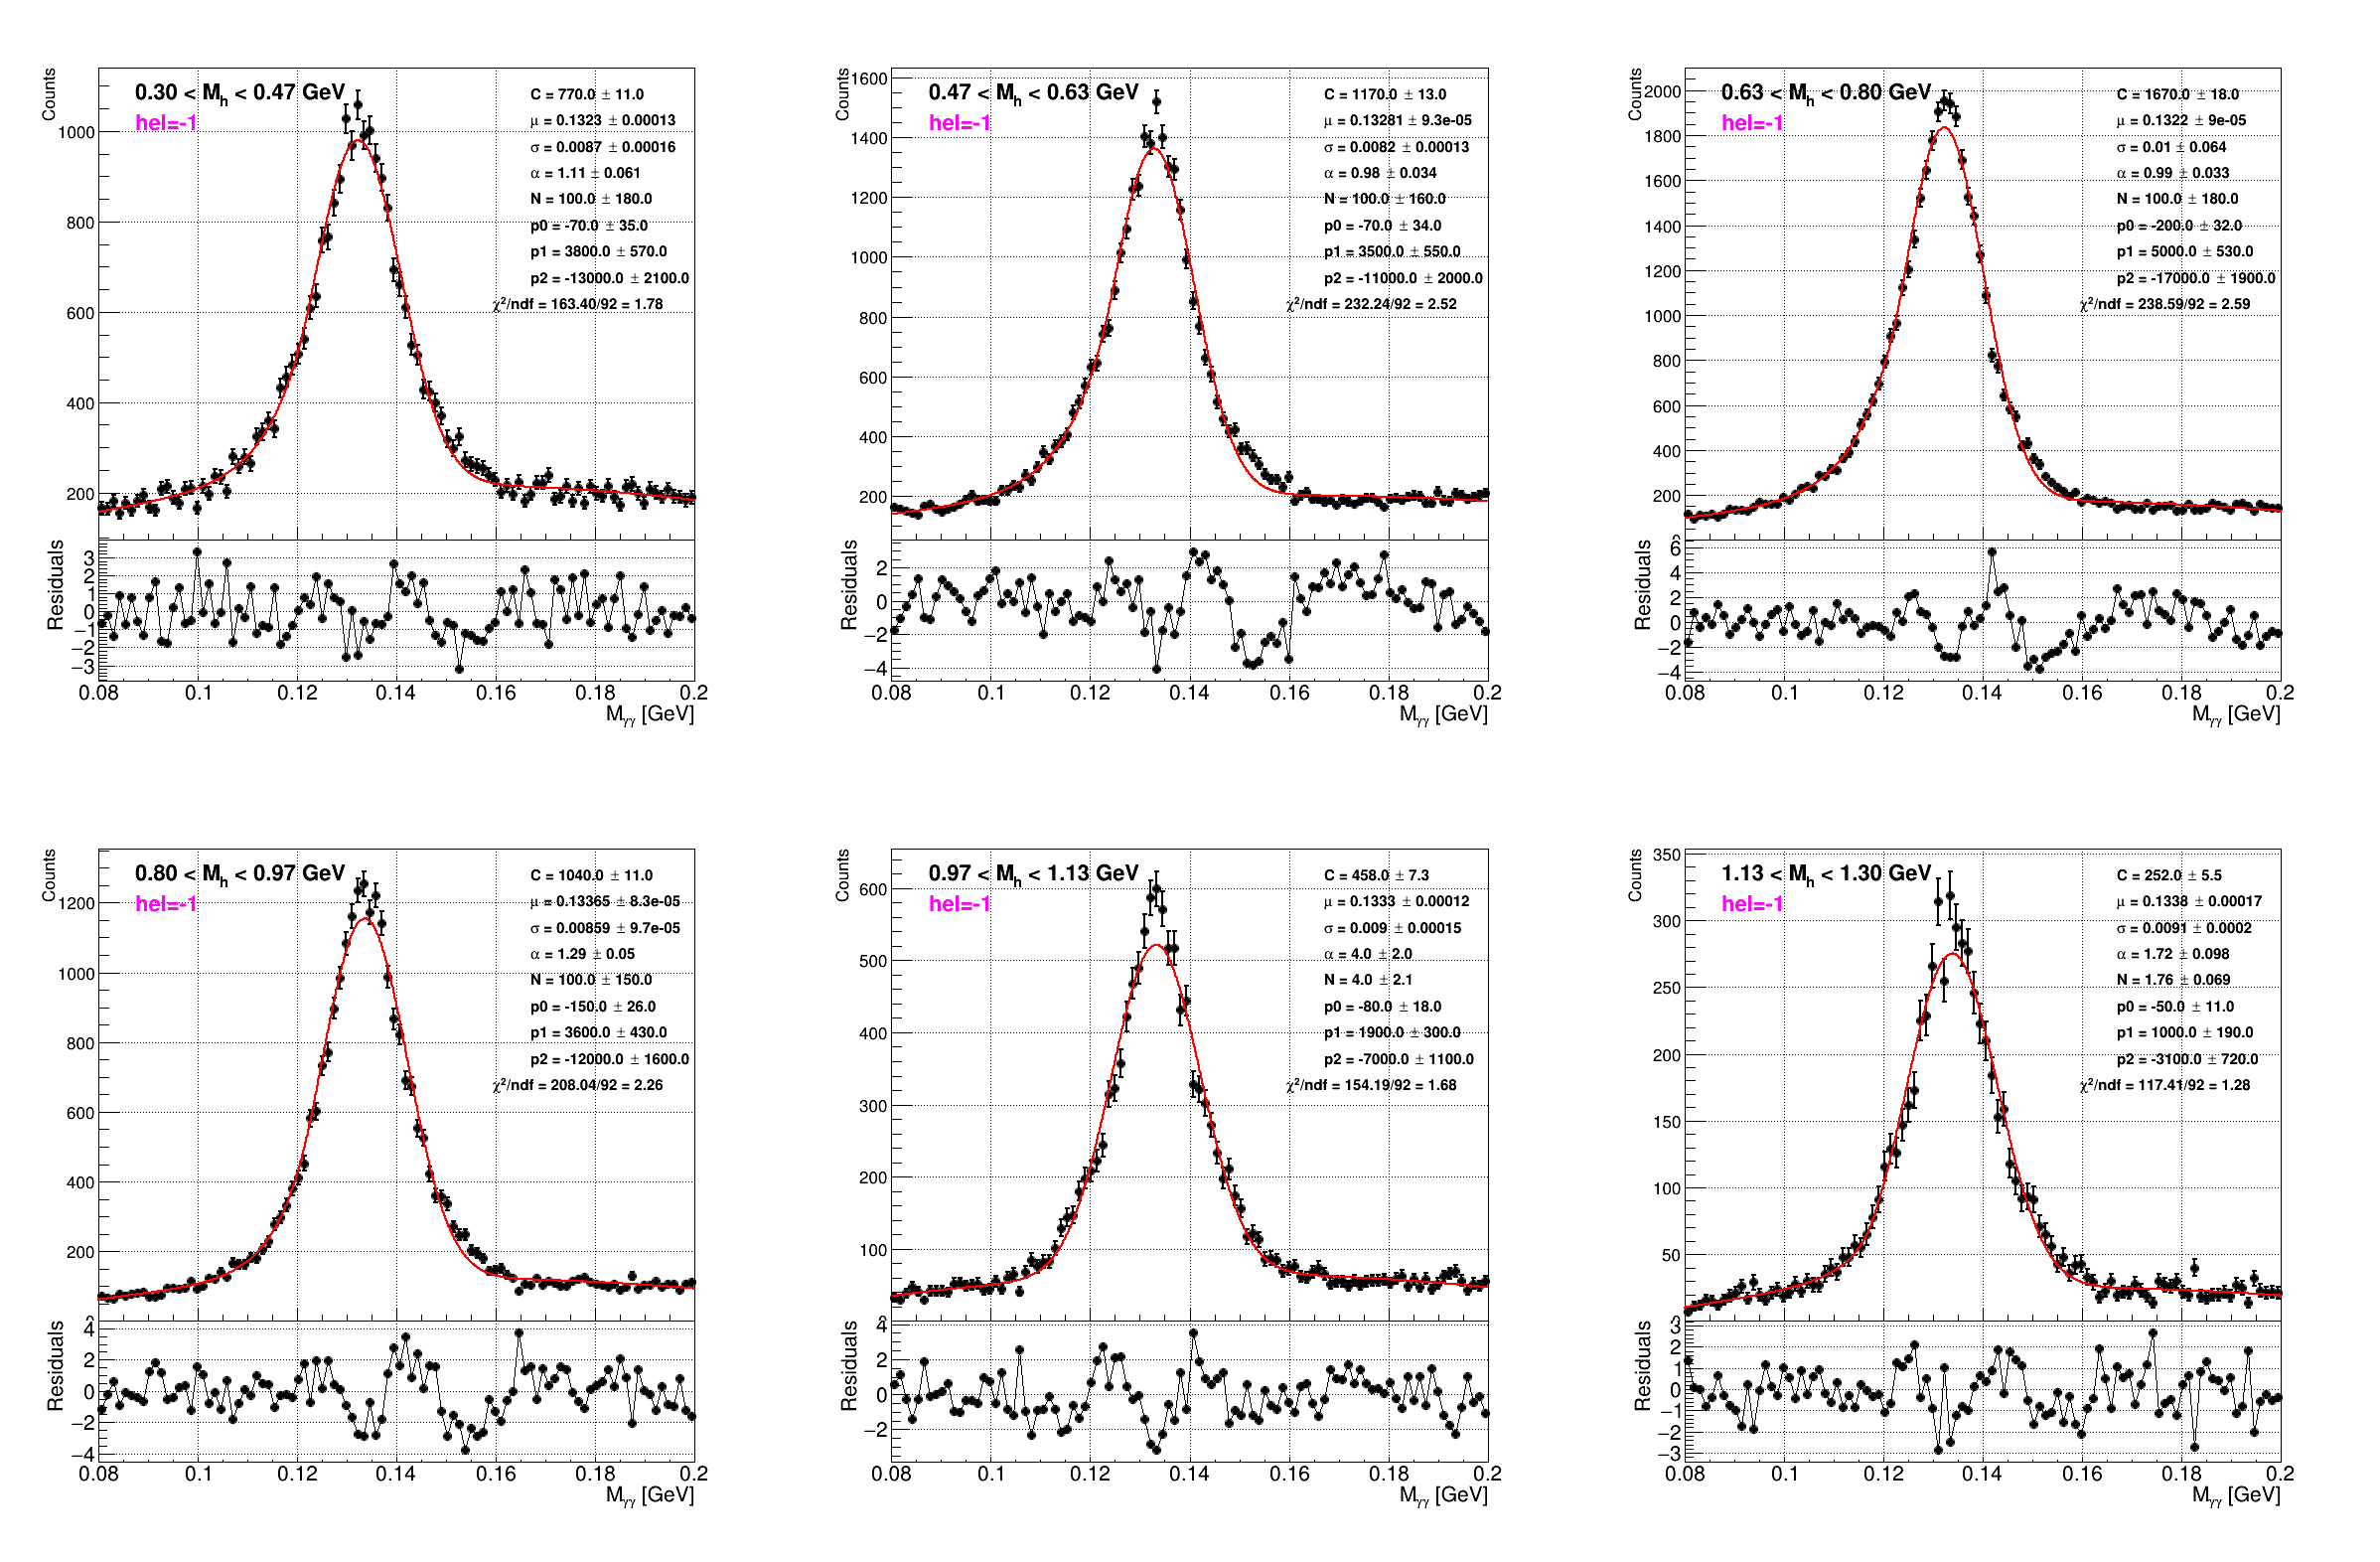

In [9]:
c = TCanvas("c","c",2400,1600)
c.Divide(3,2)
for i in range(6):
    c.cd(i+1)
    
    # =========== Draw fit =========== #
    p1 = TPad("p1{}".format(i),"p1{}".format(i),0,0.3,1,1)
    p1.Draw()
    p1.cd()
    p1.SetBottomMargin(0)
    h_minus[i].Draw("E1")
    f_minus[i].Draw("same")
    gPad.SetGrid()
    biglatex.DrawLatexNDC(0.15,0.84,"{:.2f} < ".format(Mhbins[i]) + "M_{h} <"+" {:.2f} GeV".format(Mhbins[i+1]))
    biglatex.DrawLatexNDC(0.15,0.78,"#color[6]{hel=-1}")
    drawFitLatex(latex,0.68,0.84,0.05,f_minus[i],"crystalball(0)+pol2(5)")
    c.cd(i+1)
    
    # =========== Draw residuals =========== #
    p2 = TPad("p2{}".format(i),"p2{}".format(i),0,0.05,1,0.3)
    p2.Draw()
    p2.cd()
    p2.SetTopMargin(0)
    p2.SetBottomMargin(0.25)
    res_minus[i].Draw("APL")
    gPad.SetGrid()
c.Draw()

Prepare Mh asymmetry histograms

In [10]:
h_plus, h_minus = get_A_LU_Mh(d,[beta_cut],Mhbins,10,10,0.08,0.2,"1")

Process Mh asymmetry histograms

In [11]:
fitpars,errors = process_A_LU_Mh(h_plus,h_minus)

Create three asymmetry plots

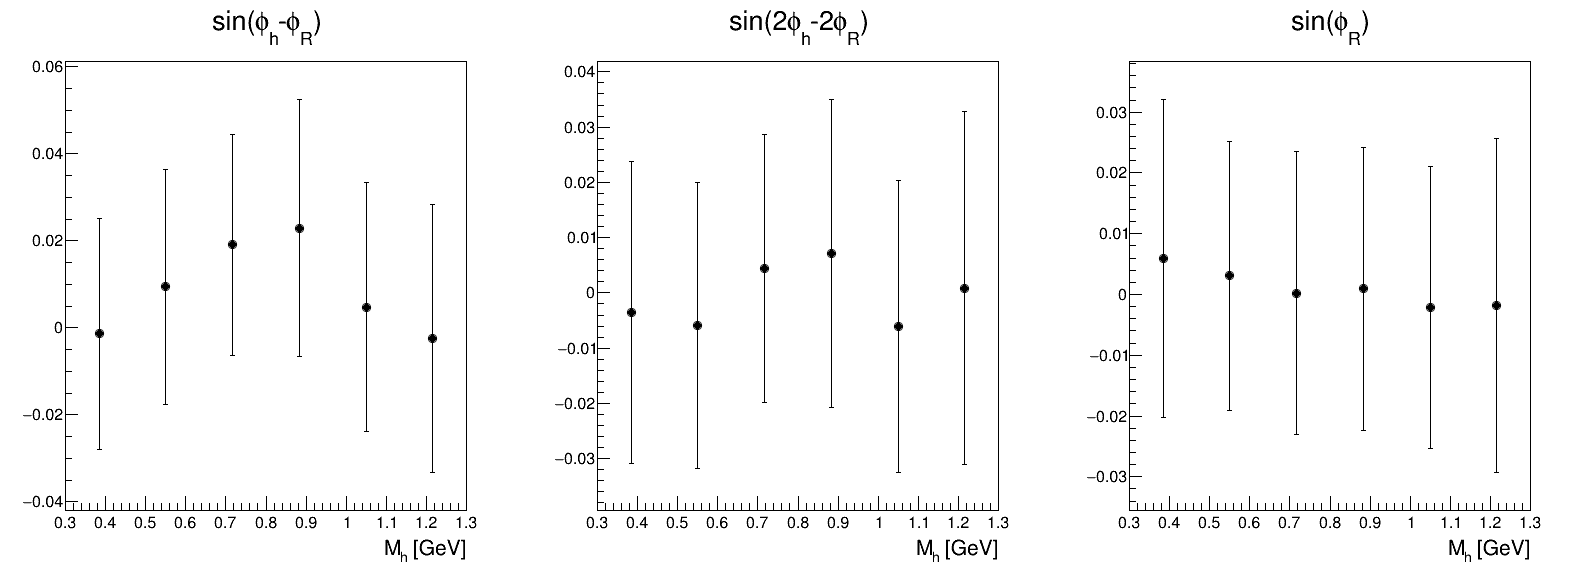

In [13]:
idx_mods = [1,0,3]

c = TCanvas("c","c",1600,600)
c.Divide(3,1)
tges=[]
for i in range(3):
    c.cd(i+1)
    
    idx = idx_mods[i]
    modulation_name = mods[idx]
    
    # Create TGraphErrors for plotting
    tges.append(TGraphErrors(len(Mhbins)-1))
    tges[i].SetMarkerStyle(20)
    tges[i].SetTitle("{}".format(modulation_name)+";M_{h} [GeV];")
    for j in range(tges[i].GetN()):
        x = np.mean(Mhbins[j:j+2])
        y = fitpars[j,idx]
        yerr = errors[j,idx]
        tges[i].SetPoint(j,x,y)
        tges[i].SetPointError(j,0,yerr)
    tges[i].Draw("APE")
c.Draw()